**Nama: Moh Evan Alsadik | Nim: 053779188 | STDA4101**

In [54]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
file_tugas = "Tugas 3 STDA4101-2024.1.xlsx"
tugas_df = pd.read_excel(file_tugas)
# tugas_df.describe()

age = tugas_df["AGE"]
body_mass_index = tugas_df["BMI"]
average_blood_pressure = tugas_df["BP"]
total_serum_cholesterol = tugas_df["S1"]
perkembangan_penyakit = tugas_df["Y"]
print("\n")

**Berdasarkan data ukuran kuantitatif perkembangan penyakit setelah satu tahun amatan (Y),
usia dalam tahun (AGE), body mass index (BMI), average blood pressure (BP), dan total serum
cholesterol (S1) terlampir, lakukan analisis statistik deskriptif dengan cara:**

### Buatlah visualisasi data multivariat menggunakan Scatter Plot.

**Data multivariat** merupakan data yang dikumpulkan dari dua atau lebih pengamatan dan diukur menggunakan beberapa karakteristik. Singkatnya, data ini melibatkan lebih dari satu variabel baik independent maupun dependent yang dilakuklan analisis secara bersamaan.

**Scatterplot** adalah salah satu grafik yang umum digunakan dalam menemukan suatu pola hubungan antara 2 variabel. Komponen pada grafik ini terdiri dari garis memanjang (x) sebagai variabel independent, garis melebar untuk variabel dependen, serta titik yang merepresentasikan nilai x dan y.

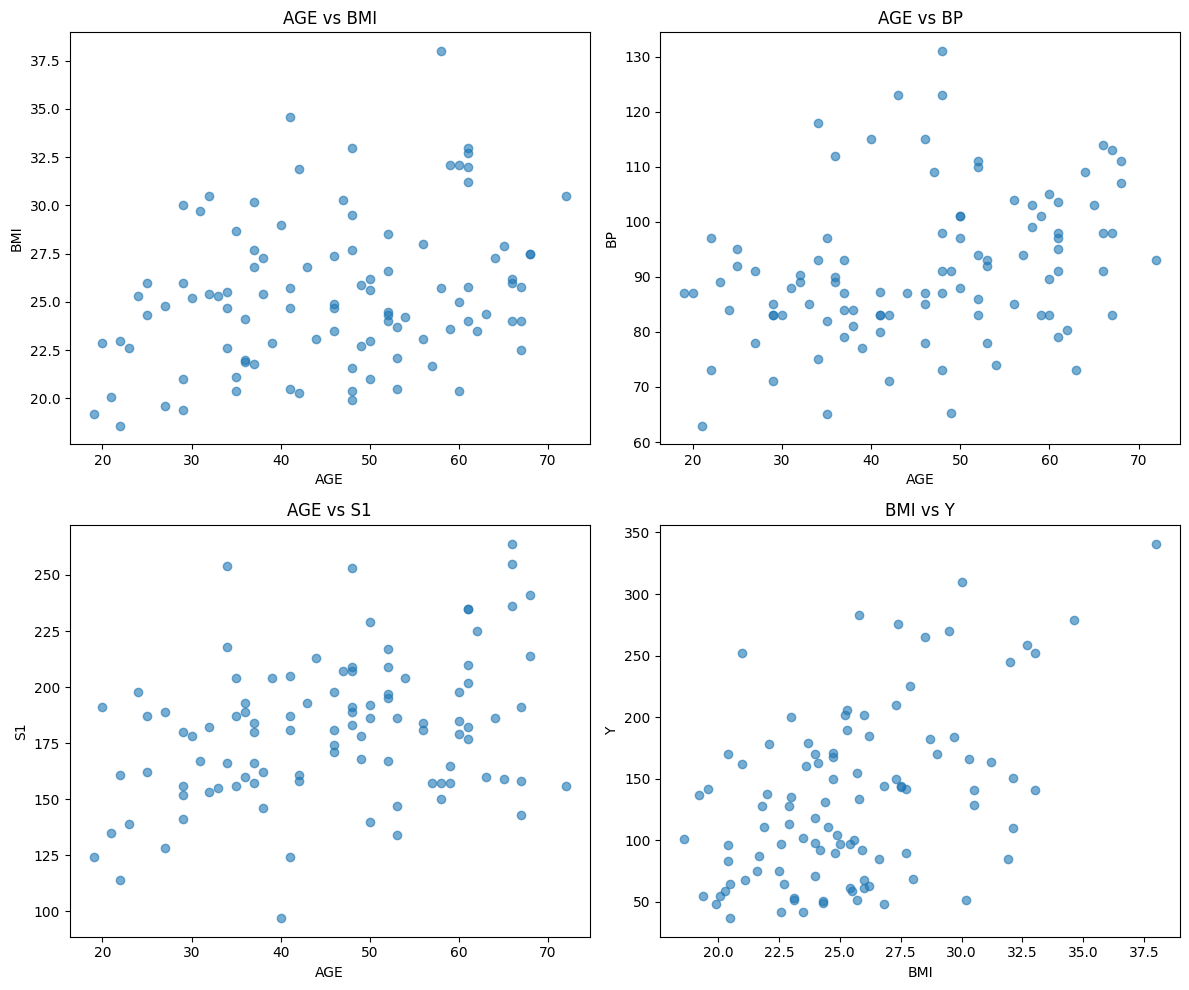

In [52]:
# Grid 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot AGE dengan BMI
axes[0, 0].scatter(age, body_mass_index, alpha=0.6)
axes[0, 0].set_title('AGE vs BMI')
axes[0, 0].set_xlabel('AGE')
axes[0, 0].set_ylabel('BMI')

# Plot AGE dengan BP
axes[0, 1].scatter(age, average_blood_pressure, alpha=0.6)
axes[0, 1].set_title('AGE vs BP')
axes[0, 1].set_xlabel('AGE')
axes[0, 1].set_ylabel('BP')

# Plot AGE dengan S1
axes[1, 0].scatter(age, total_serum_cholesterol, alpha=0.6)
axes[1, 0].set_title('AGE vs S1')
axes[1, 0].set_xlabel('AGE')
axes[1, 0].set_ylabel('S1')

# Plot BMI dengan Y
axes[1, 1].scatter(body_mass_index, perkembangan_penyakit, alpha=0.6)
axes[1, 1].set_title('BMI vs Y')
axes[1, 1].set_xlabel('BMI')
axes[1, 1].set_ylabel('Y')

plt.tight_layout()  # Atur tata letak supaya tidak tumpang tindih
plt.show()
print("\n")

### Tentukan model persamaan regresi linear.

In [53]:
# Variabel independen (AGE, BMI, BP, S1)
X = tugas_df[['AGE', 'BMI', 'BP', 'S1']]

# Menambahkan konstanta (intercept) ke variabel independen
X = sm.add_constant(X)  # Tambahkan kolom konstanta (1) agar ada intercept

# Variabel dependen (Y)
Y = tugas_df['Y']

# Model regresi
model = sm.OLS(Y, X).fit()

# Ringkasan hasil regresi
print(model.summary())
print("\n")

# Menampilkan hasil regresi
print("Persamaan Regresi Linear:")
print(f"Y = {intercept:.2f} + {slope:.2f} * X")
print(f"Koefisien Korelasi (r): {r_value:.2f}")  # Menunjukkan kekuatan dan arah hubungan
print(f"p-value: \t\t{p_value:.4f}")  # Menguji signifikansi hubungan antar variabel
print(f"Standard Error: \t{std_err:.2f}")  # Mengukur ketidakpastian dalam estimasi slope.
print("\n")

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     8.768
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           4.55e-06
Time:                        11:42:49   Log-Likelihood:                -549.34
No. Observations:                 100   AIC:                             1109.
Df Residuals:                      95   BIC:                             1122.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -119.8912     53.293     -2.250      0.0

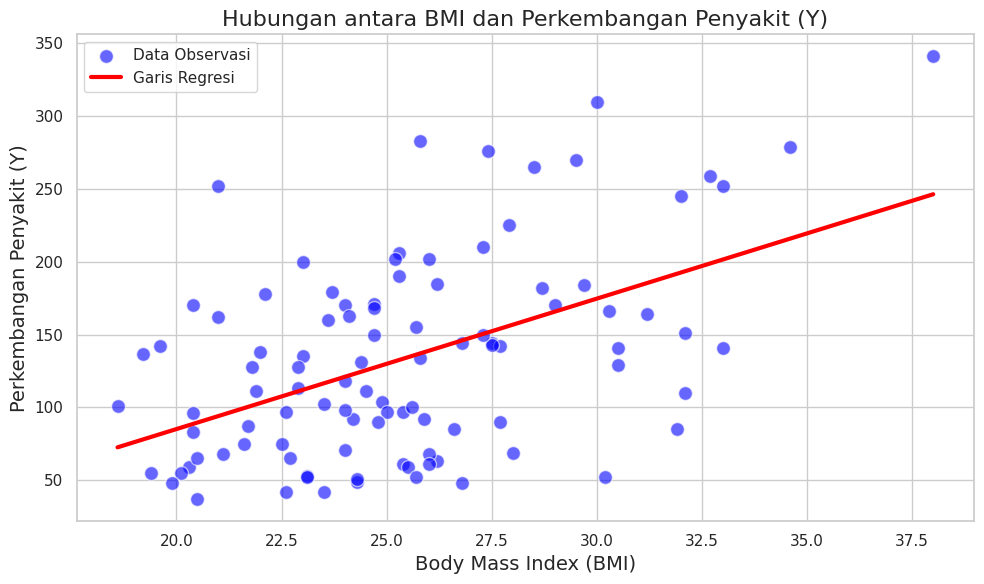

In [56]:
# Data untuk BMI dan Y
bmi = tugas_df['BMI']
y = tugas_df['Y']

# Komponen persamaan regresi
intercept = -94.10
slope = 8.96

# Membuat garis regresi berdasarkan persamaan yang telah didapat
bmi_sorted = np.sort(bmi)
y_pred = intercept + slope * bmi_sorted

# Membuat plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter Plot
plt.scatter(bmi, y, color='blue', alpha=0.6, label="Data Observasi", edgecolors="w", s=100)

# Garis Regresi
plt.plot(bmi_sorted, y_pred, color='red', linewidth=3, label="Garis Regresi")

# Label dan Grid
plt.title("Hubungan antara BMI dan Perkembangan Penyakit (Y)", fontsize=16)
plt.xlabel("Body Mass Index (BMI)", fontsize=14)
plt.ylabel("Perkembangan Penyakit (Y)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Menampilkan plot
plt.show()
print("\n")

### Berikan ulasan Anda tentang model tersebut. 

**Keterangan mengenai definisi, komponen, dan pengujian signifikansi** (pada tugas sebelumnya)
___
**Persamaan regresi linear**:

$$Y = a + bX$$

ket.
* a = intersep (nilai Y ketika X = 0) => intercept
* b = koefisien regresi (kemiringan/gradien) => slope
* Y = variabel dependen (perkembangan penyakit)
* X = variabel independen (usia)

**r-value**:
$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \cdot \sum (Y_i - \bar{Y})^2}}
$$
* *koefisien korelasi Pearson* adalah angka yang mengukur kekuatan serta arah hubungan linier antar variabel (X dan Y).
    * r = 1  : Hubungan positif sempurna, setiap ada kenaikan pada satu variabel selalu diikuti oleh kenaikan proporsional pada variabel lain.
    * r = −1 : Hubungan negatif sempurna, setiap ada kenaikan pada satu variabel selalu diikuti oleh penurunan proporsional pada variabel lain.
    * r = 0  : Tidak ada hubungan linier.

**p-value**:
$$
p = 2 \cdot \text{Pr}\left( |t| \geq \frac{b}{\text{SE}} \right)
$$
* *nilai probabilitas* yang digunakan pada pengujian hipotesis. Nilai ini digunakan untuk mengukur apakah hubungan tersebut signifikan secara statistik atau hanya terjadi karena kebetulan.
    * p<0.05: Hubungan antara variabel X dan Y *signifikan secara statistik*. Artinya, peluang hubungan tersebut terjadi secara kebetulan adalah kurang dari 5%.
    * p>0.05: Tidak cukup bukti untuk menyatakan hubungan signifikan. Artinya ada indikasi bahwa lebih dari 5% hubungan yang ada terjadi secara kebetulan.

**stderr**:
$$
\text{SE} = \sqrt{\frac{\sum (Y_i - \hat{Y}_i)^2}{(n - 2) \cdot \sum (X_i - \bar{X})^2}}
$$
* *ukuran variabilitas* dalam estimasi parameter, sebagai contoh nilai slope (b). Nilai stderr ini memberi gambaran seberapa luas kemungkinan estimasi parameter bisa berubah jika data yang digunakan berbeda (misalnya, dalam pengambilan sampel data ulang).
    * Jika nilai stderr kecil, berarti estimasi parameter stabil dan dapat dipercaya (karena variasi parameternya kecil).
    * Jika nilai stderr besar, berarti estimasi parameter kurang akurat, sehingga hasil regresi menjadi diragukan.

____________________________________________________________________________________________________________________
Didapatkan **persamaan regresinya** adalah:

$$Y = 100.56 + 0.72X$$

keterangan:
* Ketika X = 0, nilai rata-rata yang diprediksi untuk Y adalah 100.56 (*nilai intercept*). Dalam data, usia nol tahun tidak pernah ada.
* Tiap kali usia (X) bertambah 1 tahun, akan dihubungkan dengan peningkatan rata-rata perkembangan penyakit (Y) sebesar 0.72.

Selanjutnya untuk:
* Nilai **koefisien korelasi** (r = 0.14) menunjukkan hubungan yang **sangat lemah** antara kedua variabel tersebut. (nilai r yang lebih dekat dengan angka 0 menunjukkan ketidaan hubungan linear, sedangkan jika nilai r mendekati -1 atau 1 berarti keduanya memiliki hubungan).
* Nilai (p-value = 0.1572) menunjukkan **kurangnya bukti statistik** dalam menyimpulkan bahwa hubungan kedua variabel ini signifikan secara statistik (hampir 16% hubungan yang ada terjadi secara kebetulan).
* Nilai standard error = 0.51 lebih kecil dibangingkan dengan nilai slope (0.72). Hal ini menunjukkan bahwa **model lebih stabil dan hasil estimasi slope lebih dapat dipercaya**. *Namun* karena nilai p-value yang tinggi, maka sudah cukup mendukung kesimpulan bahwa hubungan ini kemungkinan besar terjadi secara kebetulan.

**Kesimpulan**:

Persamaan regresi yang diperoleh adalah $Y = 100.56 + 0.72X$. Persamaan ini menunjukkan bahwa untuk setiap kenaikan usia ($1$ tahun) dihubungkan dengan peningkatan rata-rata perkembangan penyakit sebesar $(b = 0.72)$. Namun, dengan nilai koefisien korelasi yang terlalu lemah $(r = 0.14)$ serta nilai p-value yang tinggi $(p = 0.1572)$, membuat hubungan ini tidak signifikan secara statistik. Sehingga model kurang dapat dipercaya/diandalkan dalam memprediksi perkembangan penyakit berdasarkan usia. Untuk analisis yang lebih mendalam dan akurat, diperlukan mengeksplorasi faktor (variabel) lain dan melakukan perbaikan model dengan cara memasukkan lebih banyak variabel yang relevan.
<br><br><br>

**Sumber Referensi**

Sutikno., & Ratnaningsih, D. J. (2025). Metode Statistika I. Modul 01 & 02. Tangerang, Banten.
Universitas Terbuka.

Wijaya, T., & Budiman, S. (2016). Analisis multivariat untuk penelitian manajemen. Yogyakarta: Pohon Cahaya.

https://learn.nural.id/course/statistics/regresi-linier/scatterplot#:~:text=Scatterplot%20adalah%20sebuah%20grafik%20yang,merepresentasikan%20nilai%20x%20dan%20y.

https://www.investopedia.com/terms/m/mlr.asp#:~:text=Multiple%20linear%20regression%20(MLR)%20is,uses%20just%20one%20explanatory%20variable.

https://www.w3schools.com/python/python_ml_multiple_regression.asp